# Pipeline

## Import libraries and define parameters and functions

### parameters

In [2]:
context = 'local'

### paths

In [6]:
import re
import sys
import os

if context == 'local':
    # # Establish paths
    path_project = ''
    path_data = path_project+'data/'
else:
    path_data = "/dbfs/FileStore/data/"

### Packages

#### third party

In [4]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import urllib
from datetime import date, timedelta
from itertools import permutations
import datetime
import string
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from IPython.display import Image

from IPython import get_ipython

### functions

In [5]:
ls $path_data

ls: /Users/mendes/Koya-Tech/Projects/Vivian-Health/data/: No such file or directory


### modules

In [ ]:
def retrive_data(path_data,file_name,method=None):
    batch_data = pd.read_csv(path_data+file_name)
    return batch_data

def split(data,x_cols,y_cols,test_size=.33,random_state=42):
    X_data = data[x_cols]
    y_data = data[y_cols]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def preprocessing_x_data(data,preprosser_x_data):
    return data,preprosser_x_data

def preprocessing_y_data(data,preprosser_y_data):
    return data,preprosser_y_data

def train_model(x_data,y_data):
    return model, training_metrics, predictions

def prediction(x_data,model):
    return predictions

def evaluation(labels,predictions):
    return metrics

def get_stats_predictions(predictions):
    return stats

def quality_training(metrics,stats):
    return decision

def quality_process(stats):
    return decision

def read_artifact(path_artifacts,file_name):
    artifact = read(path_artifacts+file_name)
    
def save_artifact(path_artifacts,file_name):
    save(path_artifacts+file_name)
    
def push_predictions(path_data,file_name,method=None,predictions):
    save(predictions)

## training and validation pipeline

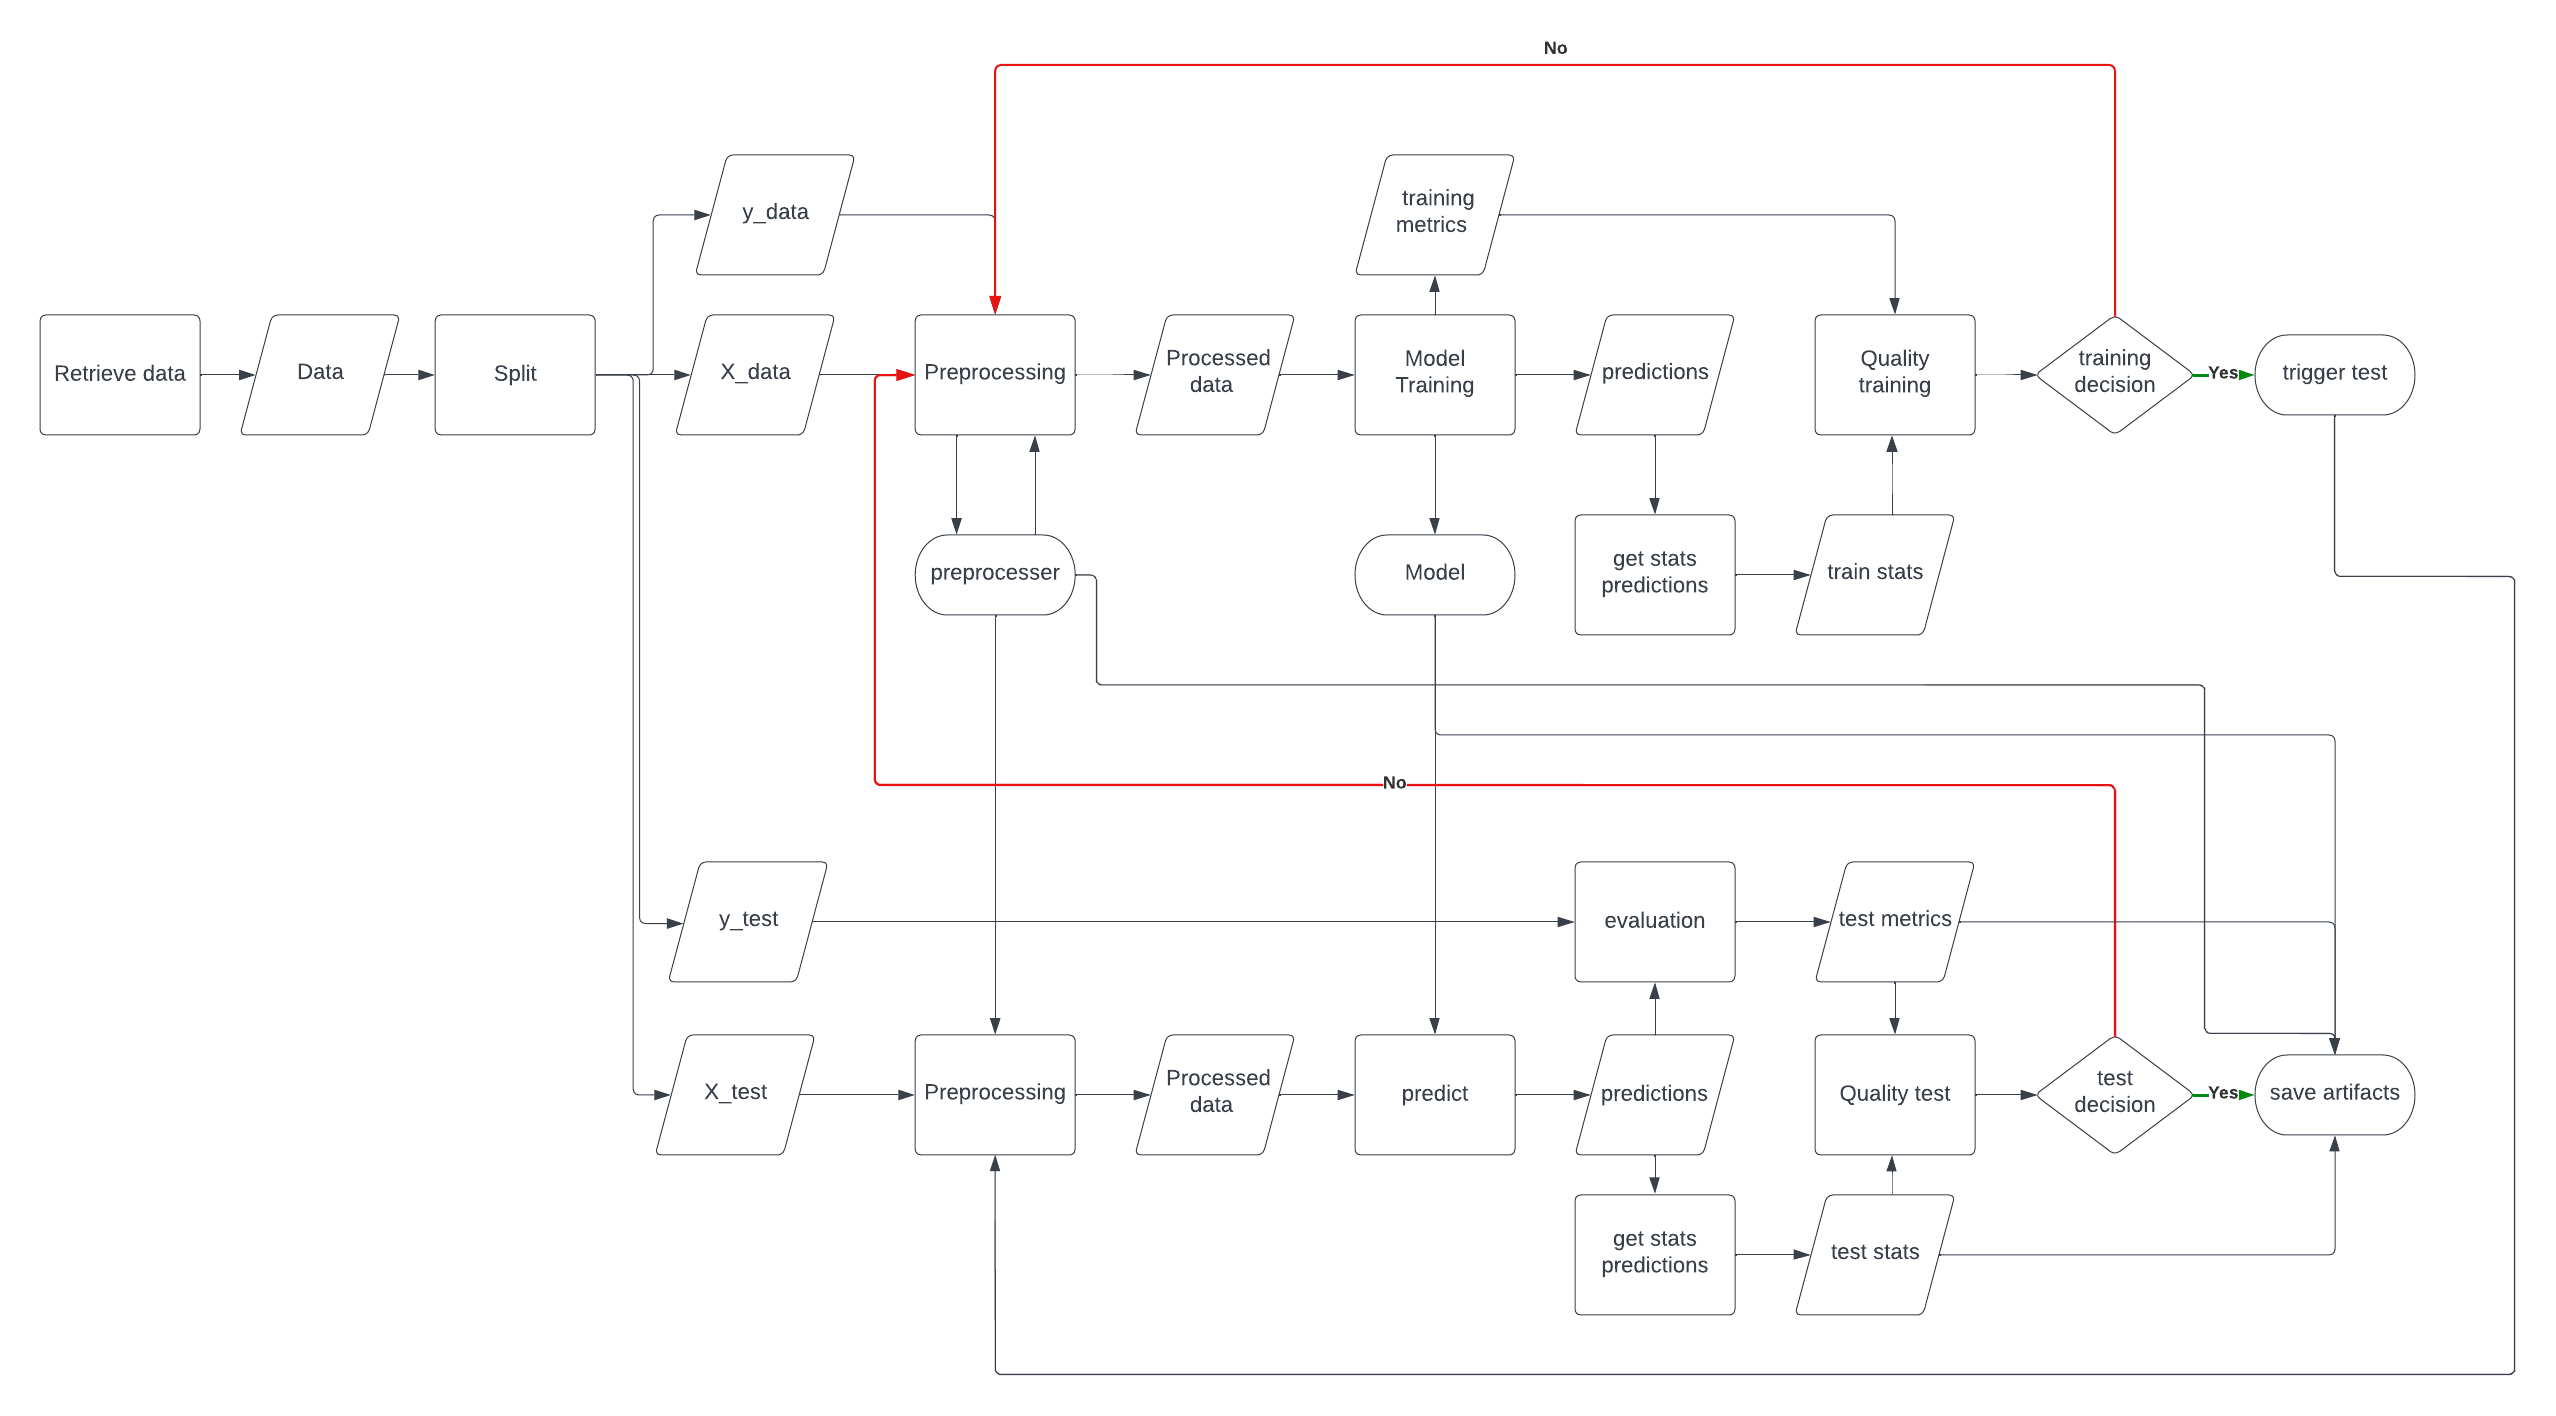

In [34]:
Image(filename='train_test_vivian.png')

In [24]:
#retrieve data
data = retrive_data(path_data,file_name,method=None)

#preprocessing
X_train, X_test, y_train, y_test = split(data,x_cols,y_cols,test_size=.33,random_state=42)

preprosser_x_data = read_artifact(path_artifacts,file_name)
preprosser_y_data = read_artifact(path_artifacts,file_name)

X_train = preprocessing_x_data(X_train,preprosser_x_data)
y_train = preprocessing_y_data(y_train,preprosser_y_data)

#training
model, training_metrics, training_predictions = train_model(X_train,y_train)

train_stats = get_stats_predictions(training_predictions)

training_decision = quality_training(training_metrics,train_stats)

training_decision_stats = quality_process(train_stats)

if training_decision in ['Good','Great']:
    print('trigger test')
else:
    print('trigger retrain')

#testing

X_test = preprocessing_x_data(X_test,preprosser_x_data)
y_test = preprocessing_y_data(y_test,preprosser_y_data)

test_predictions = prediction(X_test,model)

test_stats = get_stats_predictions(test_predictions)

test_metrics = evaluation(y_test,test_predictions)

test_decision = quality_training(test_metrics,test_stats)

test_decision_stats = quality_process(test_stats)

if test_decision in ['Good','Great']:
    print('trigger save artifacts')
    #save artifacts
    save_artifact(path_artifacts,file_name,preprosser_x_data)
    save_artifact(path_artifacts,file_name,preprosser_y_data)
    save_artifact(path_artifacts,file_name,model)
    save_artifact(path_artifacts,file_name,test_metrics)
    save_artifact(path_artifacts,file_name,test_stats)
else:
    print('trigger retrain')
    


## Production pipeline

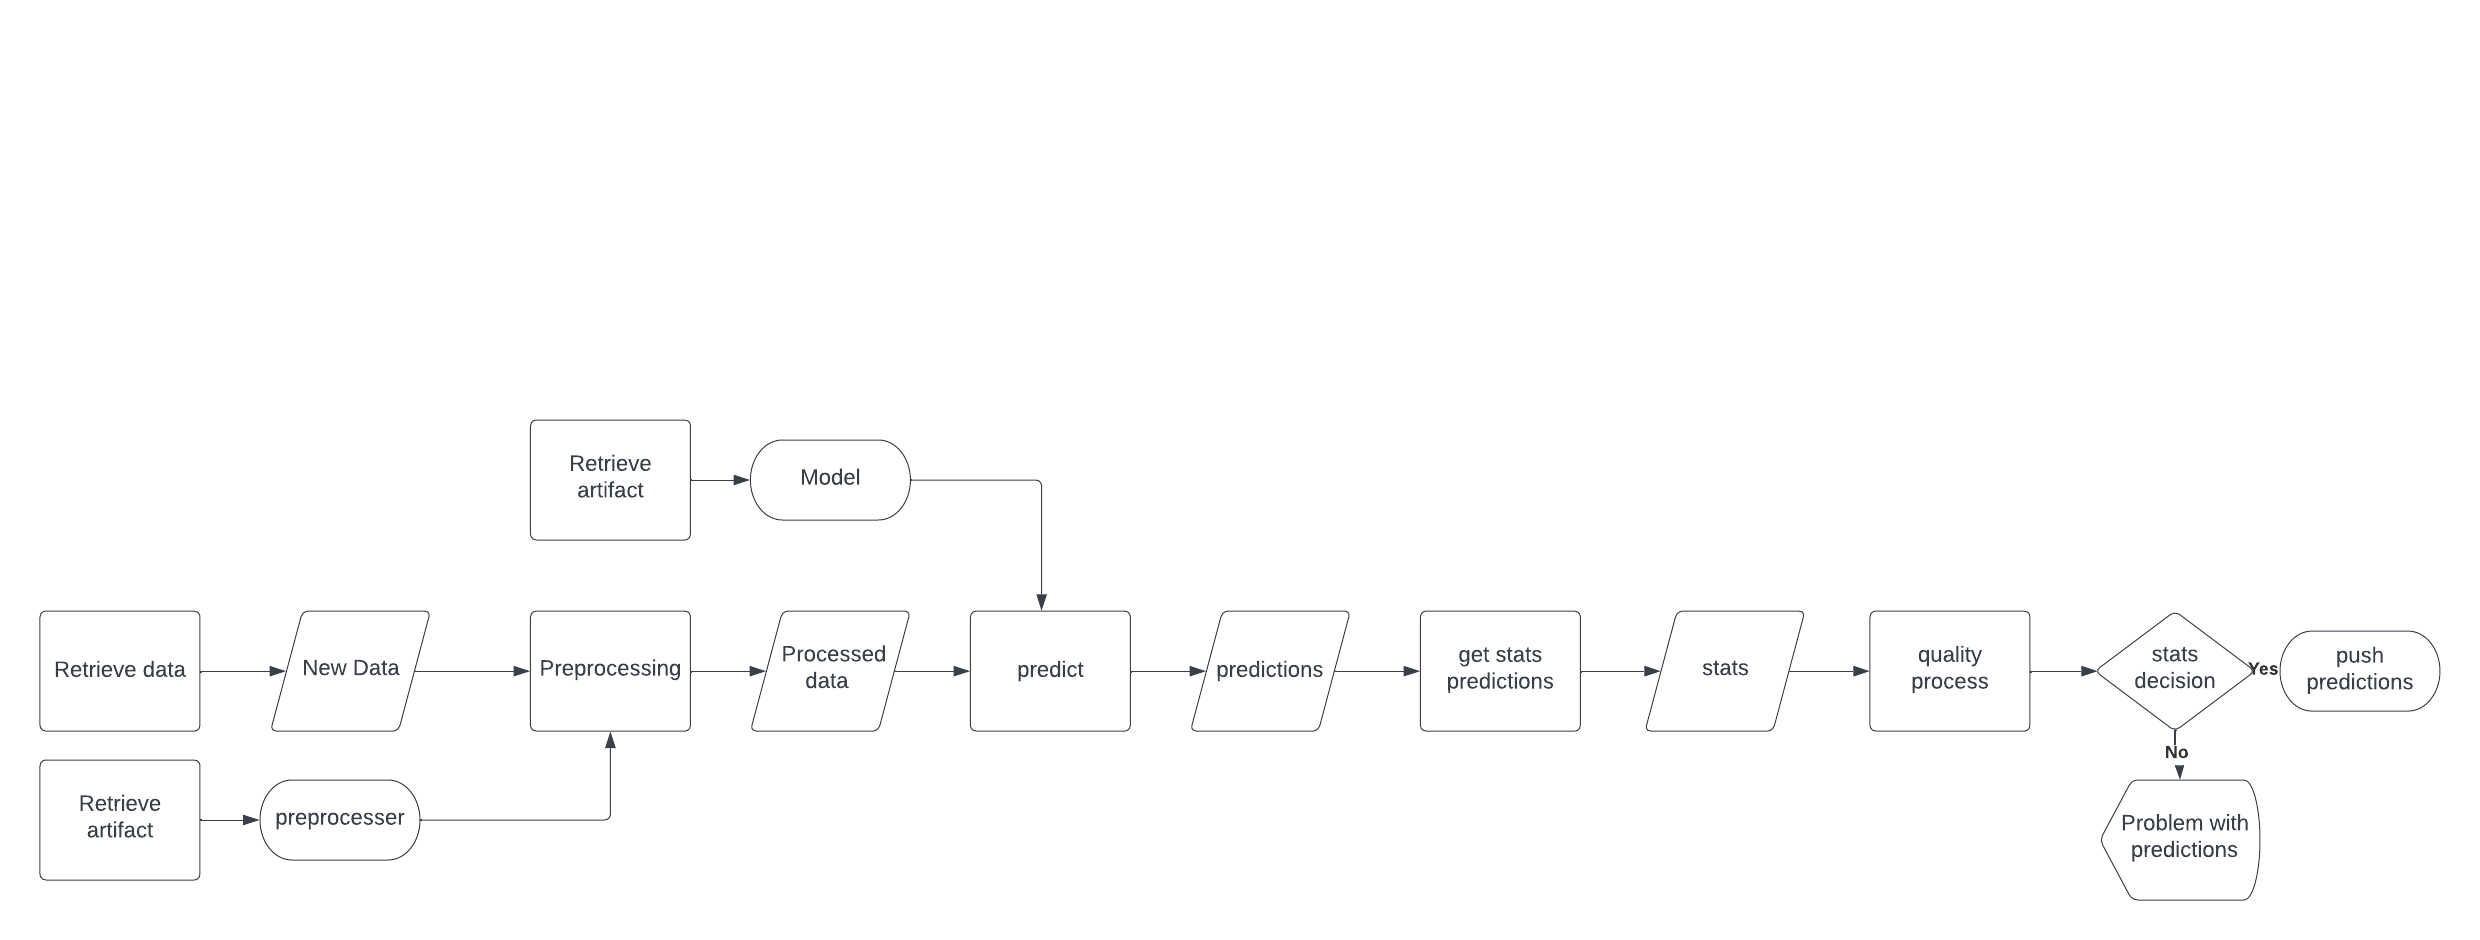

In [36]:
Image(filename='vivianproduction.png')

In [ ]:
data = retrive_data(path_data,file_name,method=None)

preprosser_x_data = read_artifact(path_artifacts,file_name)
X_data = preprocessing_x_data(data,preprosser_x_data)

model = read_artifact(path_artifacts,file_name)
predictions = prediction(X_data,model)

stats = get_stats_predictions(predictions)

decision_stats = quality_process(stats)

if test_decision in ['Good','Great']:
    print('trigger push predictions')
    push_predictions(path_data,file_name,method=None,predictions)
else:
    print('trigger problem on stats')